# TALLER 3: Visualizaciones de arboles y redes.

Lina Buitrago

Miguel Angel Avila


In [ ]:
!pip install networkx
!pip install pyvis
!pip install plotly

  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=6017f7205071af6c787f282be43971e27699d37f4647f041f3229ef15a6442a9
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


datos extraidos de:
http://users.csc.calpoly.edu/~dekhtyar/466-Fall2010/labs/lab07.html

http://www-personal.umich.edu/~mejn/netdata/
#descripción de la base
una red social no dirigida de asociaciones frecuentes entre 62 delfines en una comunidad que vive en Doubtful Sound, Nueva Zelanda. Cite a D. Lusseau, K. Schneider, OJ Boisseau, P. Haase, E. Slooten y SM Dawson, Behavioral Ecology and Sociobiology 54 , 396-405 (2003). Gracias a David Lusseau por permitirnos publicar estos datos en este sitio web.

  + D. Lusseau, Las propiedades emergentes de una red social de delfines,
  proc. R. Soc. Londres B (suplemento) 270, S186-S188 (2003).

  + D. Lusseau, Evidencia del rol social en una red social de delfines,
  Preimpresión q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)

In [ ]:
g = nx.read_gml ('/content/drive/MyDrive/Colab Notebooks/Visualización de datos en Python/dolphins.gml')
print("Número de nodos:", g.number_of_nodes())
print("Número de enlaces:", g.number_of_edges())

Número de nodos: 62
Número de enlaces: 159


In [ ]:
list(g.nodes)

['Beak',
 'Beescratch',
 'Bumper',
 'CCL',
 'Cross',
 'DN16',
 'DN21',
 'DN63',
 'Double',
 'Feather',
 'Fish',
 'Five',
 'Fork',
 'Gallatin',
 'Grin',
 'Haecksel',
 'Hook',
 'Jet',
 'Jonah',
 'Knit',
 'Kringel',
 'MN105',
 'MN23',
 'MN60',
 'MN83',
 'Mus',
 'Notch',
 'Number1',
 'Oscar',
 'Patchback',
 'PL',
 'Quasi',
 'Ripplefluke',
 'Scabs',
 'Shmuddel',
 'SMN5',
 'SN100',
 'SN4',
 'SN63',
 'SN89',
 'SN9',
 'SN90',
 'SN96',
 'Stripes',
 'Thumper',
 'Topless',
 'TR120',
 'TR77',
 'TR82',
 'TR88',
 'TR99',
 'Trigger',
 'TSN103',
 'TSN83',
 'Upbang',
 'Vau',
 'Wave',
 'Web',
 'Whitetip',
 'Zap',
 'Zig',
 'Zipfel']

In [ ]:
list(g.edges)

[('Beak', 'Fish'),
 ('Beak', 'Grin'),
 ('Beak', 'Haecksel'),
 ('Beak', 'SN9'),
 ('Beak', 'SN96'),
 ('Beak', 'TR77'),
 ('Beescratch', 'Jet'),
 ('Beescratch', 'Knit'),
 ('Beescratch', 'Notch'),
 ('Beescratch', 'Number1'),
 ('Beescratch', 'Oscar'),
 ('Beescratch', 'SN100'),
 ('Beescratch', 'SN90'),
 ('Beescratch', 'Upbang'),
 ('Bumper', 'Fish'),
 ('Bumper', 'SN96'),
 ('Bumper', 'Thumper'),
 ('Bumper', 'Zipfel'),
 ('CCL', 'Double'),
 ('CCL', 'Grin'),
 ('CCL', 'Zap'),
 ('Cross', 'Trigger'),
 ('DN16', 'Feather'),
 ('DN16', 'Gallatin'),
 ('DN16', 'Wave'),
 ('DN16', 'Web'),
 ('DN21', 'Feather'),
 ('DN21', 'Gallatin'),
 ('DN21', 'Jet'),
 ('DN21', 'Upbang'),
 ('DN21', 'Wave'),
 ('DN21', 'Web'),
 ('DN63', 'Knit'),
 ('DN63', 'Number1'),
 ('DN63', 'PL'),
 ('DN63', 'SN9'),
 ('DN63', 'Upbang'),
 ('Double', 'Kringel'),
 ('Double', 'Oscar'),
 ('Double', 'SN4'),
 ('Double', 'Topless'),
 ('Double', 'Zap'),
 ('Feather', 'Gallatin'),
 ('Feather', 'Jet'),
 ('Feather', 'Ripplefluke'),
 ('Feather', 'SN90'),
 

In [ ]:
df = pd.DataFrame({ 'from':['Beak','Beak','Beak','Beak','Beak','Beak','Beescratch','Beescratch','Beescratch','Beescratch','Beescratch','Beescratch','Beescratch','Beescratch',
                            'Bumper','Bumper','Bumper','Bumper','CCL','CCL','CCL','Cross','DN16','DN16','DN16','DN16',
                            'DN21','DN21','DN21','DN21','DN21','DN21','DN63','DN63','DN63','DN63','DN63',
                            'Double','Double','Double','Double','Double','Feather','Feather','Feather','Feather','Feather',
                            'Fish','Fish','Fish','Fork','Gallatin','Gallatin','Gallatin','Gallatin','Gallatin',
                            'Grin','Grin','Grin','Grin','Grin','Grin','Grin','Grin','Grin','Grin','Haecksel','Haecksel','Haecksel','Haecksel','Haecksel','Haecksel',
                            'Hook','Hook','Hook','Hook','Hook','Jet','Jet','Jet','Jet','Jet','Jonah','Jonah','Jonah','Jonah','Jonah','Jonah',
                            'Knit','Knit','Kringel','Kringel','Kringel','Kringel','Kringel','Kringel','MN105','MN105','MN105','MN105','MN105',
                            'MN60','MN60','MN60','MN83','MN83','MN83','Mus','Mus','Notch','Oscar','Oscar','Patchback','Patchback','Patchback','Patchback','Patchback',
                            'PL','PL','Ripplefluke','Scabs','Scabs','Scabs','Scabs','Scabs','Scabs','Shmuddel','Shmuddel','Shmuddel',
                            'SN100','SN100','SN100','SN100','SN4','SN4','SN4','SN4','SN63','SN63','SN63','SN63','SN89','SN9','SN90', 'SN90','SN96','SN96',
                            'Stripes','Stripes','Topless','Topless','Topless','TR120','TR82','TR99','Trigger','TSN83','Upbang'], 'to':['Fish','Grin','Haecksel','SN9','SN96','TR77','Jet','Knit','Notch','Number1','Oscar','SN100','SN90','Upbang','Fish','SN96', 'Thumper','Zipfel','Double',
                            'Grin','Zap','Trigger','Feather','Gallatin','Wave','Web','Feather','Gallatin','Jet','Upbang','Wave','Web','Knit','Number1','PL','SN9','Upbang','Kringel','Oscar','SN4','Topless',
                            'Zap', 'Gallatin', 'Jet', 'Ripplefluke','SN90','Web','Patchback','SN96','TR77','Trigger','Scabs','Jet','Ripplefluke','SN90','Upbang','Web','Hook','MN83','Scabs','Shmuddel','SN4',
                            'SN63','SN9','Stripes','TR99','TSN103','Jonah','MN83','SN9','Topless','Vau','Zap','Kringel','Scabs','SN4','SN63','TR99','MN23','Mus','Number1','Quasi','Web','Kringel','MN105','MN83',
                            'Patchback','Topless','Trigger','PL','Upbang','Oscar','SN100''SN63','Thumper','TR77','TR99','Patchback','Scabs','SN4','Topless','Trigger','SN100','Topless','Trigger','Patchback','Topless',
                            'Trigger','Notch','Number1','Number1', 'PL','TR77','SMN5','Stripes','Topless','Trigger','TSN103','SN96','TR77','Zig','Shmuddel','SN4','SN63','SN9','Stripes','TR99','SN4','Thumper','TR88',
                            'SN4','SN89','SN9','Zap','SN9','Stripes','Topless','Zipfel','Stripes','Thumper','TSN103','Whitetip','Web','TSN103','Upbang','Web','TR77','TR99', 'TR120','TSN83','TR99','Trigger','Zap','TR88',
                            'Web','Trigger','Vau','Zipfel','Web']})
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

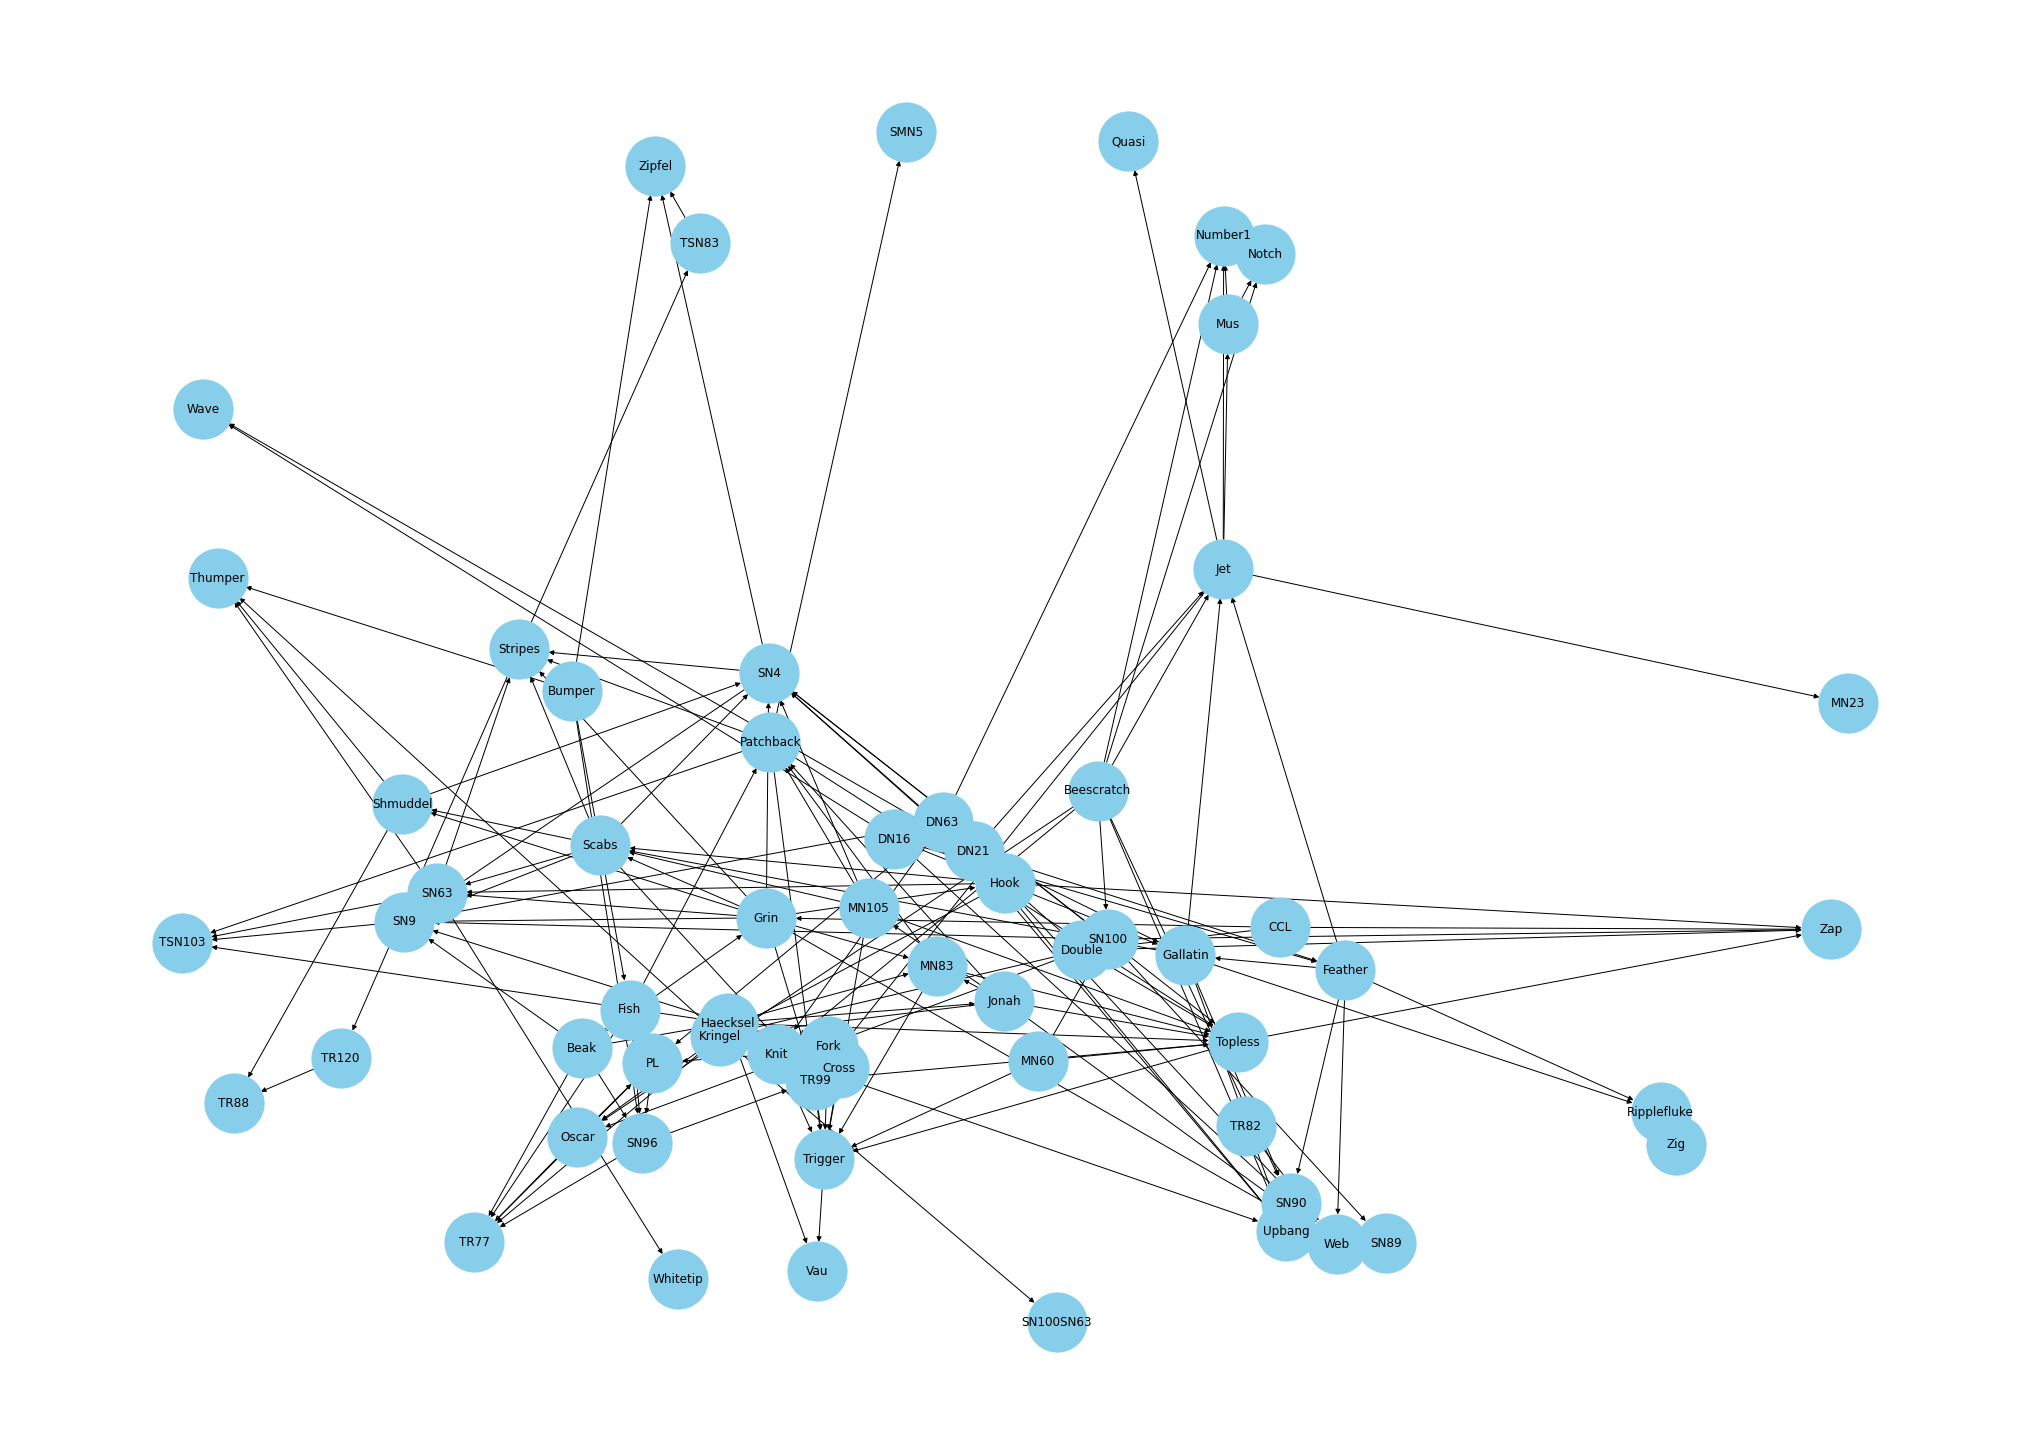

In [ ]:
from matplotlib.text import Text
plt.figure(figsize=(28,20))
nx.draw(G, with_labels=True, node_size=3500, node_color="skyblue", pos= nx.spring_layout(G))

+ **¿Qué?**  
Para efectos de la visualización se hace uso de un datase tipo red, donde los 62 nodos son representados por los delfines estudiados y 159 enlaces que representan las asociaciones entre estos, siendo los delfines de tipo categórico y las aristas de tipo cuantitativo.  


+ **¿Por qué?** 
Uno de los objetivos de la visualización es explorar y localizar, la topología y relación entre los delfines, asi como derivar y presentar sus interacciones y posibles conexiones entre sí.  

+ **¿Cómo?**  
El modismo de esta visualización es una red dirigida. No fue necesario hacer transformaciones en los datos.  

+ **Marcas y canales**  

* La visualización hace uso de Marcas de puntos para nodos y marca de líneas para las aristas o enlaces.  

Con respecto a los canales usados se destaca:

* Canal de área para los nodos, representando de esta forma la cantidad de delfines y su comportammientos a lo largo del tiempo.

* Posición espacial: No está codificada directamente en este caso, por lo tanto se presentan algunas oclusiones.  

+ **¿Cumple las reglas generales?**  
Esta visualización, no cumple con el 3D y 2D injustificado, adicionalmente no depende implícitamente de la memoria y tampoco utiliza una inmersión en la que se deba tener en cuenta la resolución y no requiere capacidad de respuesta. 


+ **Mejoras posibles**  
Como se mencionó anteriormente, se presentan problemas de oclusión, lo cual se puede modificar con una codificación diferente. Adicionalmente, sería ideal la implementación de interactividad en la visualización, donde al pararse con el cursor en cada uno de los nodos se mostrara los enlaces entre los delfines, de una forma mas didactica y resumida. Finalmente, si los datos tuvieran una variables que permiiera realizar agrupaciones, se podría hacer uso de un canal de color para diferenciarlos por categorías.

